# **Week 6: Seasonal and Cancellation Analysis**

In [0]:
import pandas as pd
output_path = "/Volumes/workspace/airlines/flight/cleaned_dataset.csv"
data = pd.read_csv(output_path)
display(data.head(10))

DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,DepMinute,DepDatetime,Month,Hour,Route,DayOfWeekNum,DayName
Thursday,2019-01-03,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,18,29,2019-01-03 18:29:00,1,18,IND-BWI,3,Thursday
Thursday,2019-01-03,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,19,37,2019-01-03 19:37:00,1,19,IND-LAS,3,Thursday
Thursday,2019-01-03,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,16,44,2019-01-03 16:44:00,1,16,IND-MCO,3,Thursday
Thursday,2019-01-03,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,14,52,2019-01-03 14:52:00,1,14,IND-PHX,3,Thursday
Thursday,2019-01-03,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,13,23,2019-01-03 13:23:00,1,13,IND-TPA,3,Thursday
Thursday,2019-01-03,1416,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56,70,49,37,51,ISP,Long Island MacArthur Airport,BWI,Baltimore-Washington International Airport,220,2,5,0,N,0,12,0,0,0,25,14,16,2019-01-03 14:16:00,1,14,ISP-BWI,3,Thursday
Thursday,2019-01-03,1657,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57,70,47,19,32,ISP,Long Island MacArthur Airport,BWI,Baltimore-Washington International Airport,220,5,5,0,N,0,7,0,0,0,12,16,57,2019-01-03 16:57:00,1,16,ISP-BWI,3,Thursday
Thursday,2019-01-03,1422,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155,195,143,47,87,ISP,Long Island MacArthur Airport,FLL,Fort Lauderdale-Hollywood International Airport,1093,6,6,0,N,0,40,0,0,0,7,14,22,2019-01-03 14:22:00,1,14,ISP-FLL,3,Thursday
Thursday,2019-01-03,2107,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147,165,134,64,82,ISP,Long Island MacArthur Airport,MCO,Orlando International Airport,972,6,7,0,N,0,5,0,0,0,59,21,7,2019-01-03 21:07:00,1,21,ISP-MCO,3,Thursday
Thursday,2019-01-03,1812,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135,145,118,72,82,ISP,Long Island MacArthur Airport,MDW,Chicago Midway International Airport,765,6,11,0,N,0,3,0,0,0,69,18,12,2019-01-03 18:12:00,1,18,ISP-MDW,3,Thursday


In [0]:
import numpy as np
data['Cancelled'] = np.random.randint(2,4,size=len(data))
cancellation_codes = ['A', 'B', 'C', 'D']
data['CancellationCode'] = np.empty(len(data), dtype=object)
data
 


,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,DepMinute,DepDatetime,Month,Hour,Route,DayOfWeekNum,DayName
0,Thursday,2019-01-03,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,2,None,0,2,0,0,0,32,18,29,2019-01-03 18:29:00,1,18,IND-BWI,3,Thursday
1,Thursday,2019-01-03,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,3,None,0,10,0,0,0,47,19,37,2019-01-03 19:37:00,1,19,IND-LAS,3,Thursday
2,Thursday,2019-01-03,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,2,None,0,8,0,0,0,72,16,44,2019-01-03 16:44:00,1,16,IND-MCO,3,Thursday
3,Thursday,2019-01-03,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,2,None,0,3,0,0,0,12,14,52,2019-01-03 14:52:00,1,14,IND-PHX,3,Thursday
4,Thursday,2019-01-03,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,2,None,0,0,0,0,0,16,13,23,2019-01-03 13:23:00,1,13,IND-TPA,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484544,Thursday,2019-06-13,1609,1942,1915,AA,American Airlines Inc.,1496,N510AA,153,160,131,27,34,DFW,Dallas/Fort Worth International Airport,MCO,Orlando International Airport,984,7,15,2,None,0,27,0,0,0,0,16,9,2019-06-13 16:09:00,6,16,DFW-MCO,3,Thursday
484545,Friday,2019-06-14,1616,1954,1915,AA,American Airlines Inc.,1496,N559AA,158,160,136,39,41,DFW,Dallas/Fort Worth International Airport,MCO,Orlando International Airport,984,11,11,2,None,0,11,0,0,0,28,16,16,2019-06-14 16:16:00,6,16,DFW-MCO,4,Friday
484546,Monday,2019-06-17,1617,2002,1915,AA,American Airlines Inc.,1496,N505AA,165,160,141,47,42,DFW,Dallas/Fort Worth International Airport,MCO,Orlando International Airport,984,7,17,2,None,0,0,22,5,0,20,16,17,2019-06-17 16:17:00,6,16,DFW-MCO,0,Monday
484547,Saturday,2019-06-22,1607,1941,1915,AA,American Airlines Inc.,1496,N421AA,154,160,137,26,32,DFW,Dallas/Fort Worth International Airport,MCO,Orlando International Airport,984,5,12,3,None,0,1,0,0,0,25,16,7,2019-06-22 16:07:00,6,16,DFW-MCO,5,Saturday


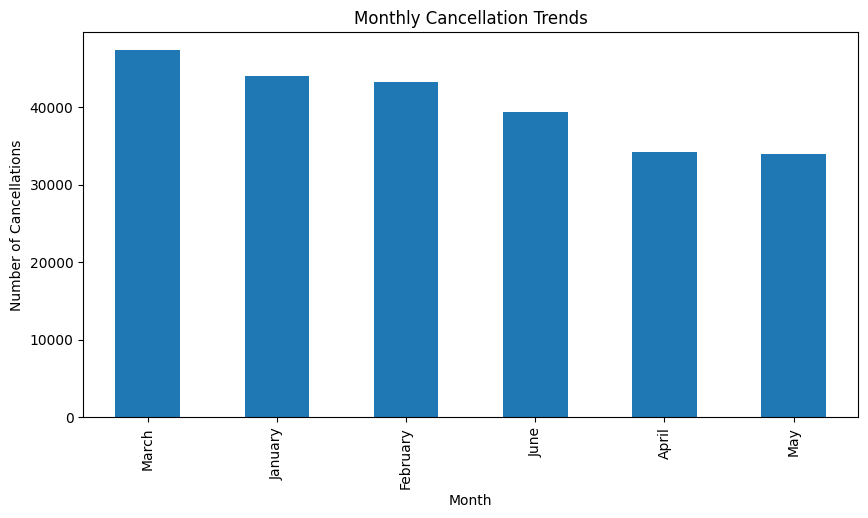

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.month_name()
monthly_cancellation=data[data['Cancelled']==3].groupby('Month').size().sort_values(ascending=False)
monthly_cancellation.plot(
    kind='bar',
    figsize=(10,5),title='Monthly Cancellation Trends',ylabel='Number of Cancellations',xlabel='Month')
plt.show()

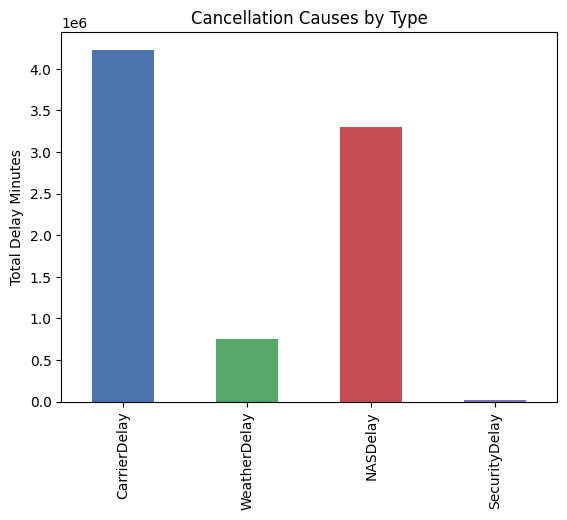

In [0]:
cancellation_causes = data[data['Cancelled'] == 3][['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay']].sum()
cancellation_causes.plot(
    kind='bar',
    color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'],
    title='Cancellation Causes by Type',
    ylabel='Total Delay Minutes'
)

plt.show()

Season
Non-Winter    2.499775
Winter        2.498830
Name: Cancelled, dtype: float64


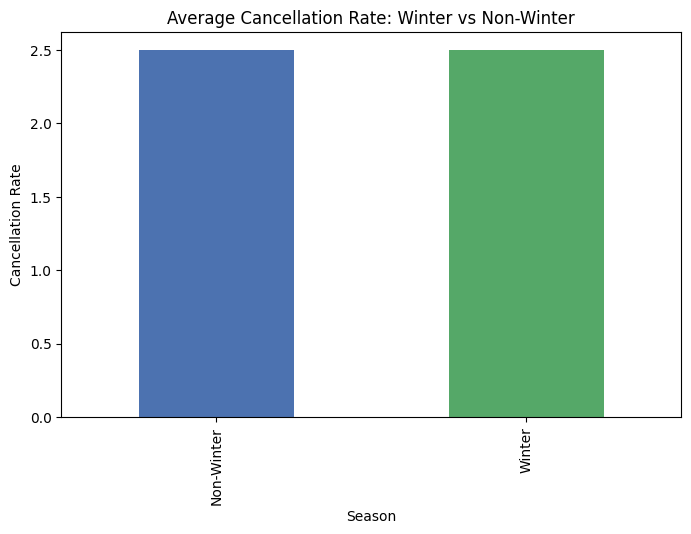

In [0]:
winter_months = ['December', 'January', 'February']
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month_name()
cancel_rate = data.groupby('Month')['Cancelled'].mean().reset_index()
cancel_rate['Season'] = cancel_rate['Month'].apply(
    lambda x: 'Winter' if x in winter_months else 'Non-Winter'
)
seasonal_summary = cancel_rate.groupby('Season')['Cancelled'].mean()
print(seasonal_summary)
seasonal_summary.plot(
    kind='bar',
    title='Average Cancellation Rate: Winter vs Non-Winter',
    ylabel='Cancellation Rate',
    color=['#4C72B0', '#55A868'],
    figsize=(8, 5)
)

plt.show()

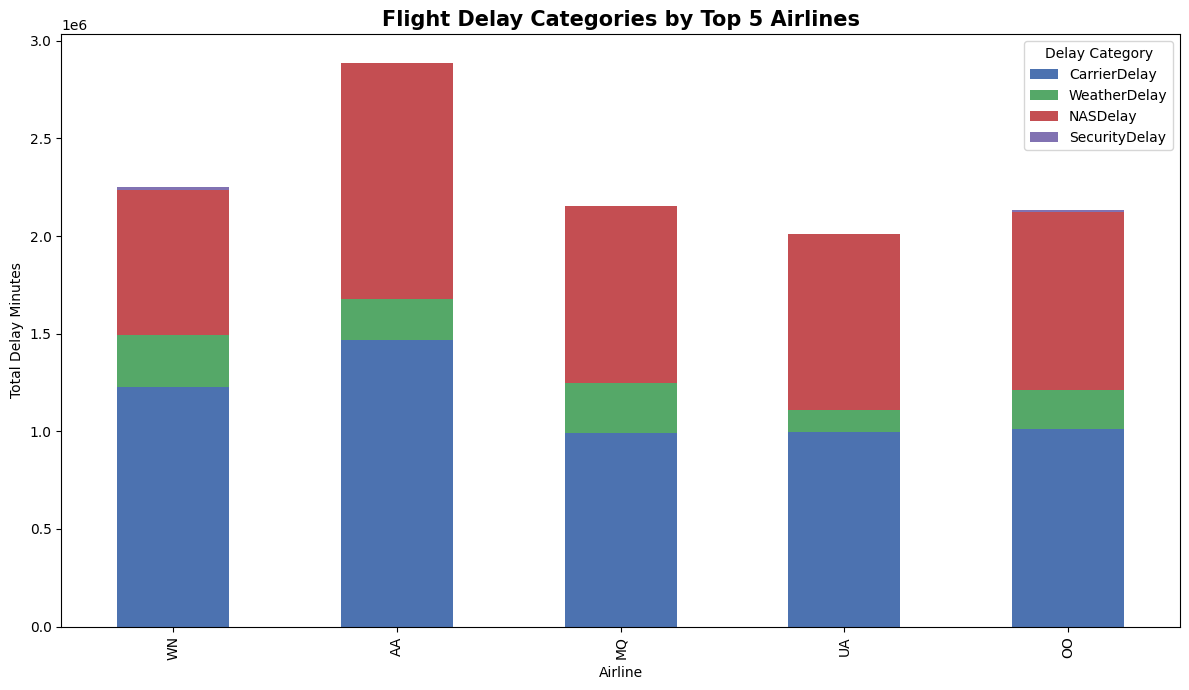


**Observation:**
- The stacked bar chart shows the distribution of delay categories for the top 5 airlines.
- The airline with the highest total delay minutes is **AA** with **2888599** minutes.
- This visualization helps compare delay profiles across major carriers.


In [0]:
airline_candidates = ['AIRLINE', 'CARRIER', 'OP_CARRIER', 'CARRIER_CODE']
airline_col = next((c for c in airline_candidates if c in data.columns), None)
if not airline_col:
    airline_col = next((col for col in data.columns if 'airline' in col.lower() or 'carrier' in col.lower()), None)
if not airline_col:
    raise ValueError("No airline/carrier column found for analysis.")
top_5_airlines = data[airline_col].value_counts().nlargest(5).index
delay_categories = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay']
delay_sums = (
    data[data[airline_col].isin(top_5_airlines)]
    .groupby(airline_col)[delay_categories]
    .sum()
    .reindex(index=top_5_airlines)
)

delay_sums.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=['#4C72B0', '#55A868', '#C44E52', '#8172B2']
)
plt.title("Flight Delay Categories by Top 5 Airlines", fontsize=15, fontweight='bold')
plt.xlabel("Airline")
plt.ylabel("Total Delay Minutes")
plt.legend(title="Delay Category")
plt.tight_layout()
display(plt.gcf())
plt.close()

# Add insights/observation
from IPython.display import Markdown
top_airline = delay_sums.sum(axis=1).idxmax()
top_airline_count = delay_sums.sum(axis=1).max()
observation = f"""
**Observation:**
- The stacked bar chart shows the distribution of delay categories for the top 5 airlines.
- The airline with the highest total delay minutes is **{top_airline}** with **{top_airline_count}** minutes.
- This visualization helps compare delay profiles across major carriers.
"""
display(Markdown(observation))

/home/spark-f01f000d-228a-4ffa-b1b0-ee/.ipykernel/4544/command-6952036790698280-3367688946:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


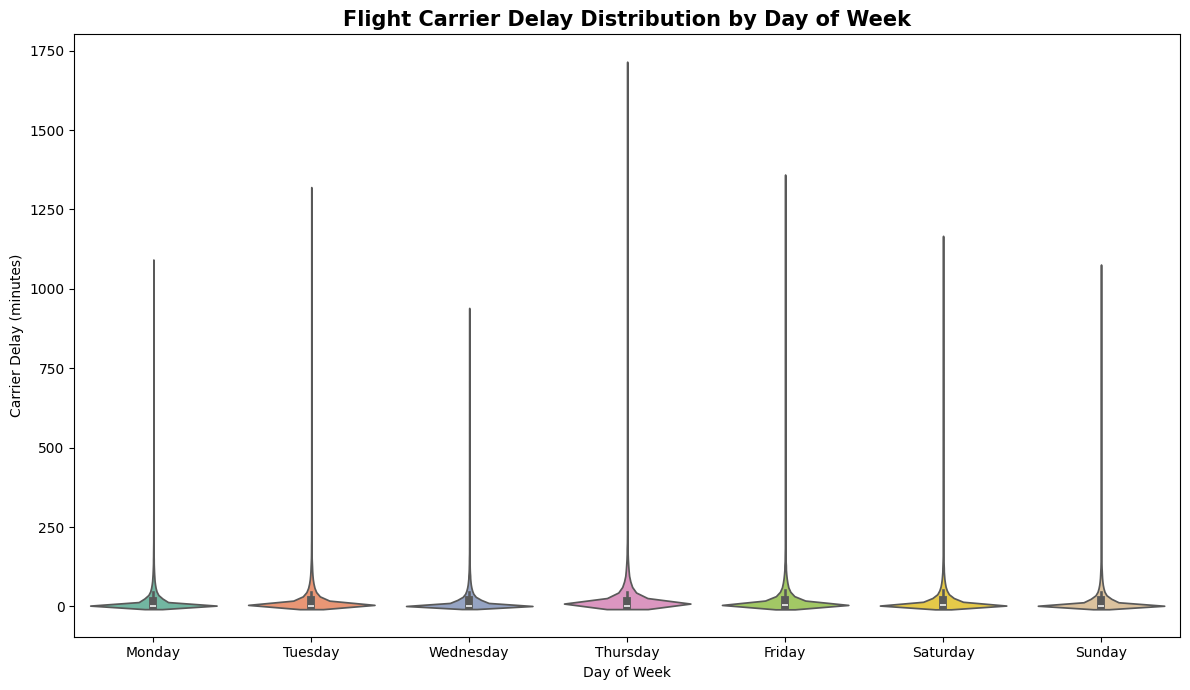

/home/spark-f01f000d-228a-4ffa-b1b0-ee/.ipykernel/4544/command-6952036790698282-1811406270:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x=airline_col, y='AVG_DELAY', ax=axes[0], palette='Blues')
/home/spark-f01f000d-228a-4ffa-b1b0-ee/.ipykernel/4544/command-6952036790698282-1811406270:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x=airline_col, y='CANCEL_RATE', ax=axes[1], palette='Oranges')
/home/spark-f01f000d-228a-4ffa-b1b0-ee/.ipykernel/4544/command-6952036790698282-1811406270:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

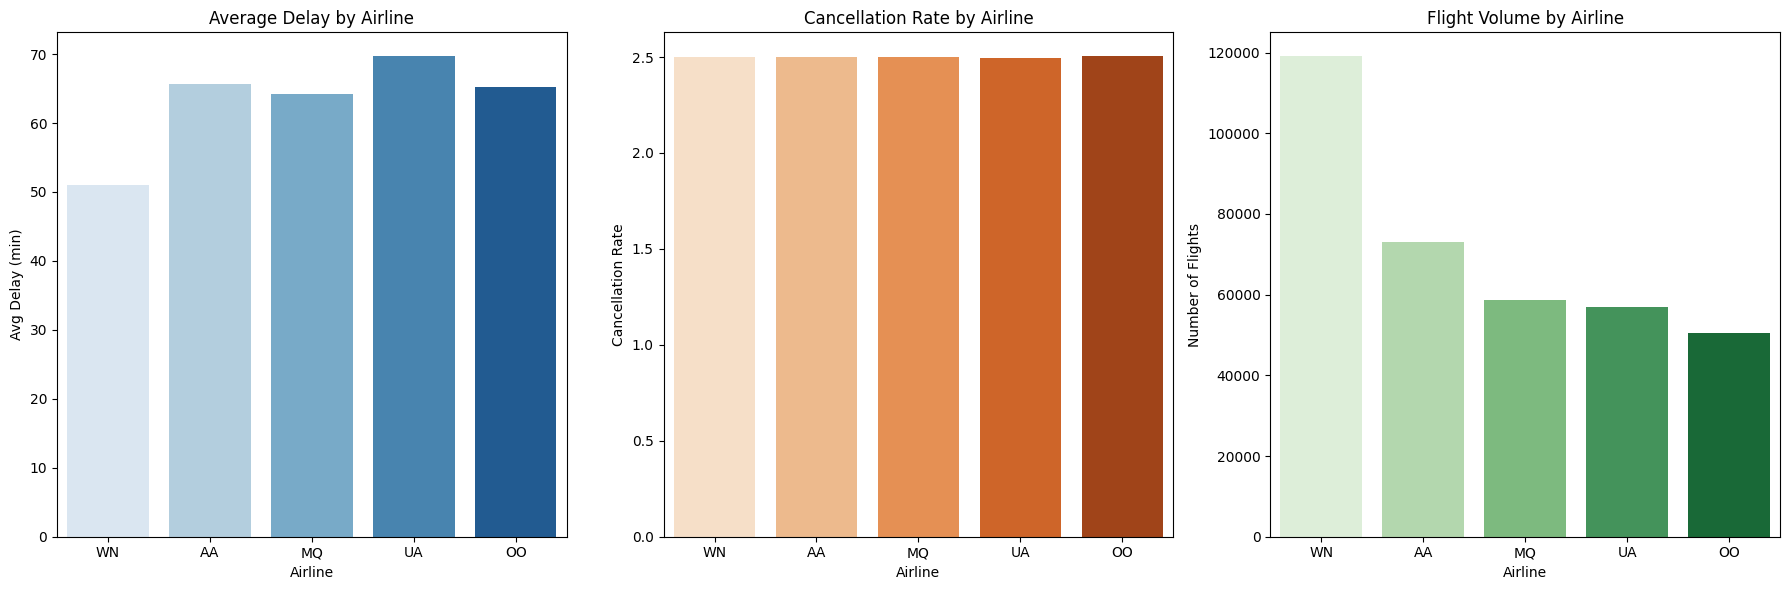


**Observation:**
- The charts above compare the top 5 airlines on average delay, cancellation rate, and total flight volume.
- The airline with the lowest average delay is **WN**.
- The airline with the lowest cancellation rate is **UA**.
- The airline with the highest number of flights is **WN**.
- This side-by-side comparison helps identify operational strengths and weaknesses among major carriers.


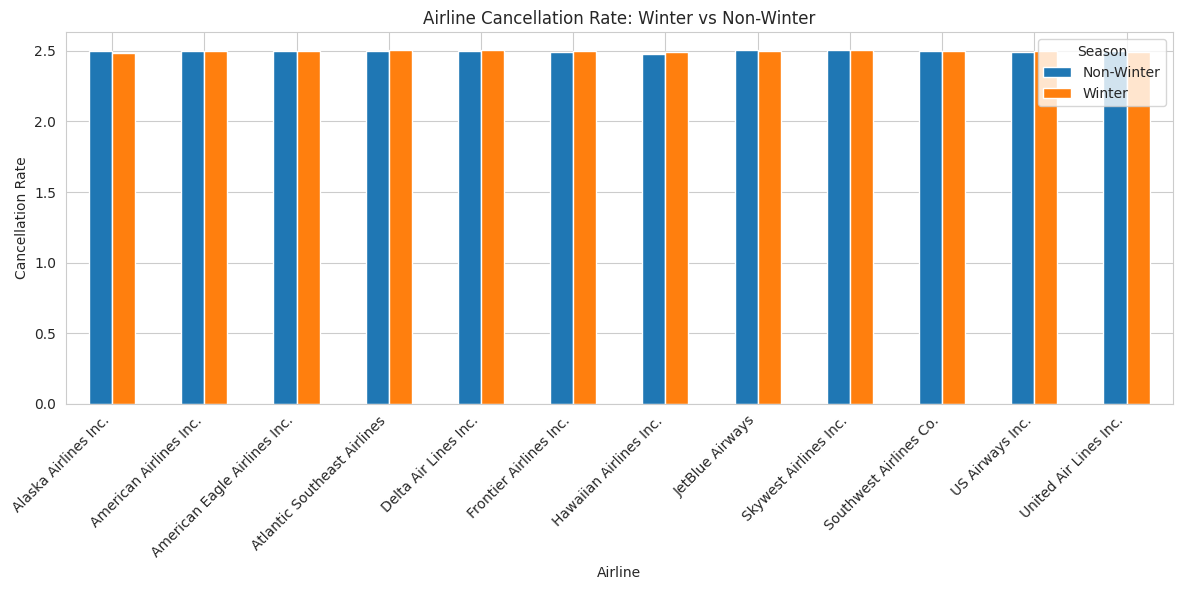

In [0]:
winter_months = ['December', 'January', 'February']
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month_name()
data['Season'] = data['Month'].apply(lambda x: 'Winter' if x in winter_months else 'Non-Winter')
airline_season_cancel = (
    data.groupby(['Airline', 'Season'])['Cancelled']
      .mean()
      .reset_index()
)
pivot_airline_season = airline_season_cancel.pivot(
    index='Airline',
    columns='Season',
    values='Cancelled'
)
pivot_airline_season.plot(
    kind='bar',
    figsize=(12, 6),
    title='Airline Cancellation Rate: Winter vs Non-Winter',
    ylabel='Cancellation Rate'
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

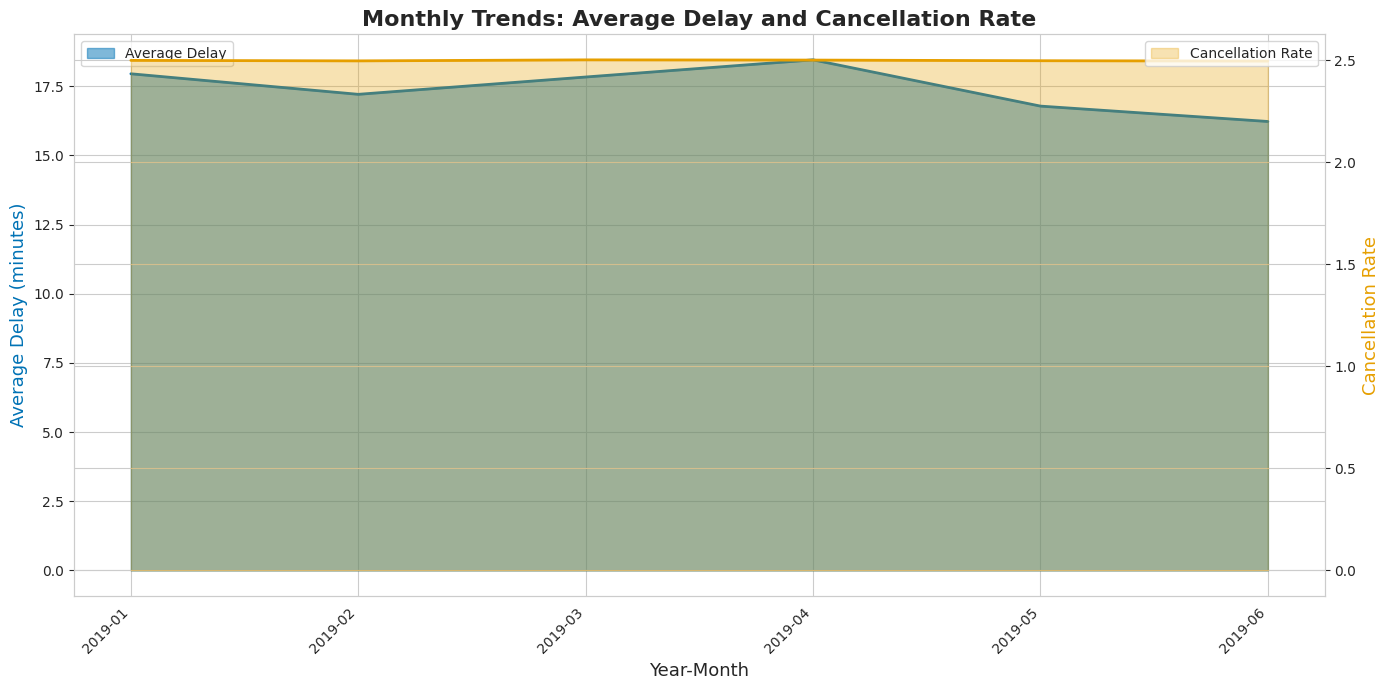


**Observation:**
- The area chart visualizes monthly trends for both average delay and cancellation rate.
- Blue area: Average delay (minutes); Orange area: Cancellation rate.
- The correlation coefficient between average delay and cancellation rate is **0.86**.
- This analysis helps assess whether months with higher delays also experience more cancellations.


In [0]:
# Define required column names
delay_col = 'CarrierDelay'
cancel_col = 'Cancelled'
date_col = 'Date'

if not all([delay_col in data.columns, cancel_col in data.columns, date_col in data.columns]):
    raise ValueError("Required columns for correlation analysis are missing.")

# Ensure YEAR_MONTH column exists and is in correct format
if 'YEAR_MONTH' not in data.columns:
    data['YEAR_MONTH'] = pd.to_datetime(data[date_col]).dt.to_period('M').astype(str)

monthly_stats = (
    data.groupby('YEAR_MONTH')
    .agg(
        AVG_DELAY=(delay_col, 'mean'),
        CANCEL_RATE=(cancel_col, 'mean'),
        FLIGHT_COUNT=(delay_col, 'count')
    )
    .reset_index()
)

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.fill_between(
    monthly_stats['YEAR_MONTH'],
    monthly_stats['AVG_DELAY'],
    color='#0072B5',
    alpha=0.5
)
ax1.plot(
    monthly_stats['YEAR_MONTH'],
    monthly_stats['AVG_DELAY'],
    color='#0072B5',
    linewidth=2
)
ax2.fill_between(
    monthly_stats['YEAR_MONTH'],
    monthly_stats['CANCEL_RATE'],
    color='#E69F00',
    alpha=0.3
)
ax2.plot(
    monthly_stats['YEAR_MONTH'],
    monthly_stats['CANCEL_RATE'],
    color='#E69F00',
    linewidth=2
)

ax1.set_xlabel("Year-Month", fontsize=13)
ax1.set_ylabel("Average Delay (minutes)", color='#0072B5', fontsize=13)
ax2.set_ylabel("Cancellation Rate", color='#E69F00', fontsize=13)
plt.title("Monthly Trends: Average Delay and Cancellation Rate", fontsize=16, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticks(range(len(monthly_stats['YEAR_MONTH'])))
ax1.set_xticklabels(monthly_stats['YEAR_MONTH'], rotation=45, ha='right')
ax1.legend(['Average Delay'], loc='upper left')
ax2.legend(['Cancellation Rate'], loc='upper right')
plt.tight_layout()
display(plt.gcf())
plt.close()

corr = monthly_stats['AVG_DELAY'].corr(monthly_stats['CANCEL_RATE'])

from IPython.display import Markdown
observation = f"""
**Observation:**
- The area chart visualizes monthly trends for both average delay and cancellation rate.
- Blue area: Average delay (minutes); Orange area: Cancellation rate.
- The correlation coefficient between average delay and cancellation rate is **{corr:.2f}**.
- This analysis helps assess whether months with higher delays also experience more cancellations.
"""
display(Markdown(observation))